<a href="https://colab.research.google.com/github/2025ab05031/Sem1_ML_Assignment2/blob/main/2025ab05031_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2025 sem1 ML Assignment 2
Name: B. Krishna Mohan
BITS ID: 2025AB05031
---



In [5]:
print("ML Assignment 2")

ML Assignment 2


In [22]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
print('✓ Libraries imported successfully')

✓ Libraries imported successfully


In [38]:
# TODO: Load your dataset
# Example: data = pd.read_csv('your_dataset.csv')
df_stroke_prediction_dataset = pd.read_csv('/content/heart.csv')

# print("Dataset size = {n_rows}:", df_stroke_prediction_dataset.shape[0])      # most common
# print("Dataset features = {n_features}:", df_stroke_prediction_dataset.shape[1])
# print("✓ Dataset loaded successfully")

# Drop any row that has at least one NaN
#df_stroke_prediction_dataset = df_stroke_prediction_dataset.dropna()
# Fill all NaN with a constant
df_stroke_prediction_dataset = df_stroke_prediction_dataset.fillna(0)

# print("Any NaN:", df_stroke_prediction_dataset.isna().values.any())
# print(df_stroke_prediction_dataset.describe())

print("After clean, Dataset size = {n_rows}:", df_stroke_prediction_dataset.shape[0])      # most common
print("After clean, Dataset features = {n_features}:", df_stroke_prediction_dataset.shape[1])

print("✓ Dataset cleaned successfully")

After clean, Dataset size = {n_rows}: 918
After clean, Dataset features = {n_features}: 12
✓ Dataset cleaned successfully


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

918
Class Counts:
 HeartDisease
1               508
0               410
Name: count, dtype: int64

Class Percentages:
 HeartDisease
1               55.337691
0               44.662309
Name: proportion, dtype: float64


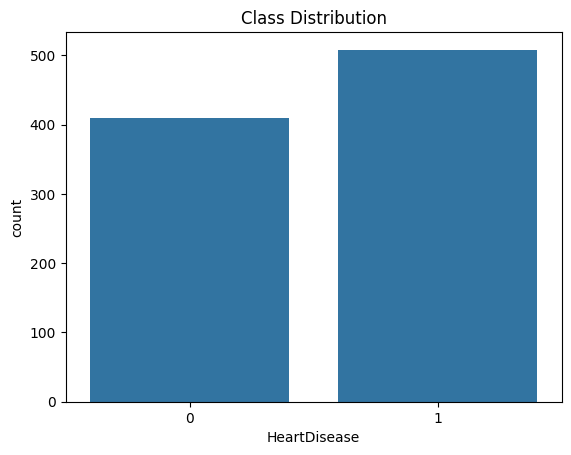

In [52]:
# TODO: Preprocess your data
# 1. Separate features (X) and target (y)
# 2. Handle missing values if any
# 3. Encode categorical variables
all_feature_column_names = df_stroke_prediction_dataset.columns
target_column_names = ['HeartDisease'] # 1 or 0
drop_columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
                'FastingBS', 'RestingECG','MaxHR', 'ExerciseAngina',
                'Oldpeak', 'ST_Slope' ]
# Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
print(df_stroke_prediction_dataset['HeartDisease'].count())



# Assuming 'df' is your DataFrame and 'target' is your column
# 1. Get Value Counts & Percentages
class_counts = df_stroke_prediction_dataset[target_column_names].value_counts()
print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", df_stroke_prediction_dataset[target_column_names].value_counts(normalize=True) * 100)

# 2. Visualize with a Count Plot (requires seaborn and matplotlib)
sns.countplot(x=target_column_names[0], data=df_stroke_prediction_dataset)
plt.title('Class Distribution')
plt.show()


# Example:
# X = data.drop('target', axis=1)
# y = data['target']
X = df_stroke_prediction_dataset.drop(columns=drop_columns, axis=1)
y = df_stroke_prediction_dataset[target_column_names]
# print(X.head(2))
# print(y.head(2))

In [33]:
from sklearn.model_selection import train_test_split

# X: features, y: target (from your chosen dataset)
# X, y = ...

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)
print(X_train.head(2))
print(y_train.head(2))

     HeartDisease
869             0
32              1
     HeartDisease
869             0
32              1


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic"  # change if multiclass
    ),
}

In [28]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score,
    precision_score, recall_score, f1_score,
    matthews_corrcoef
)

In [34]:
results = []
multi_auc = "ovr"
for name, model in models.items():
    model.fit(X_train, y_train)                # train

    y_pred = model.predict(X_test)             # class labels
    # probabilities or scores for AUC
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
        # if binary classification, take column 1
        if y_score.shape[1] == 2:
            y_score_used = y_score[:, 1]
        else:
            # one-vs-rest macro AUC for multiclass
            y_score_used = y_score
            #multi_auc = "ovr"
    else:
        y_score_used = model.decision_function(X_test)
        #multi_auc = "ovr"

    # choose 'binary' vs 'macro' depending on your problem
    average_type = "binary" if len(set(y)) == 2 else "macro"

    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average=average_type),
        "Recall": recall_score(y_test, y_pred, average=average_type),
        "F1": f1_score(y_test, y_pred, average=average_type),
        "MCC": matthews_corrcoef(y_test, y_pred),
    }

    # ROC‑AUC: handle binary vs multiclass.[web:11][web:22]
    if len(set(y)) == 2:
        metrics["AUC"] = roc_auc_score(y_test, y_score_used)
    else:
        metrics["AUC"] = roc_auc_score(
            y_test, y_score_used, multi_class=multi_auc, average="macro"
        )

    results.append(metrics)

results_df = pd.DataFrame(results)
print(results_df)

# Interpreting the results
# If accuracy and F1 are high, and MCC is also high

# If F1 is high but MCC is moderate/low, the model is good on positives
# but probably weak on negatives; you may be over‑fitting the minority/positive class

                    Model  Accuracy  Precision  Recall   F1  MCC  AUC
0     Logistic Regression       1.0        1.0     1.0  1.0  1.0  1.0
1           Decision Tree       1.0        1.0     1.0  1.0  1.0  1.0
2                     KNN       1.0        1.0     1.0  1.0  1.0  1.0
3  Naive Bayes (Gaussian)       1.0        1.0     1.0  1.0  1.0  1.0
4           Random Forest       1.0        1.0     1.0  1.0  1.0  1.0
5                 XGBoost       1.0        1.0     1.0  1.0  1.0  1.0


In [10]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.7 MB/s eta 0:00:00


In [11]:
import streamlit as st
#from ml_core import load_data, train_test, train_and_evaluate, evaluate_all

st.title("Classification Playground")

data_file = st.sidebar.file_uploader("Upload CSV", type=["csv"])
if data_file is not None:
    X, y = load_data(data_file)
    X_train, X_test, y_train, y_test = train_test(X, y)

    mode = st.sidebar.radio("Mode", ["Single model", "Compare all"])

    # collect params ...

    if st.button("Train"):
        if mode == "Single model":
            model, y_pred, y_score, metrics = train_and_evaluate(
                selected_model, params.get(selected_model, {}),
                X_train, X_test, y_train, y_test
            )
            st.write(metrics)
            # draw confusion matrix / ROC
        else:
            df_results = evaluate_all(X_train, X_test, y_train, y_test,
                                      global_params=params)
            st.dataframe(df_results)
            st.bar_chart(df_results.set_index("Model")["accuracy"])


2026-01-14 17:05:46.857 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-14 17:05:47.065 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-01-14 17:05:47.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-14 17:05:47.068 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-14 17:05:47.070 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-14 17:05:47.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-14 17:05:47.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-14 17:05:47.073 Thread 'MainThread': mi

In [12]:
!pip install -q streamlit
!npm install -q localtunnel
!pip install Flask

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
added 22 packages in 3s
⠸
⠸3 packages are looking for funding
⠸  run `npm fund` for details
⠼Requirement already satisfied: Flask in /usr/local/lib/python3.12/dist-packages (3.1.2)


In [13]:
# 1. Install necessary packages

# 2. Create the Streamlit application file (using a magic command)
%%writefile app.py
import streamlit as st
st.title("My Streamlit App in Colab")
st.write("Hello, World!")

# 3. Run the Streamlit app and expose it via localtunnel



Writing app.py


In [14]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501

⠙your url is: https://clean-hornets-shine.loca.lt
^C
